In [32]:
import sys
sys.path.insert(0,'charsiu/src/')
from Charsiu import Wav2Vec2ForFrameClassification, CharsiuPreprocessor_en, charsiu_forced_aligner
import torch 
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio


In [33]:
from datasets import load_dataset

TIMIT = load_dataset('timit_asr', data_dir='/home/tomi/Documents/tesis_speechRate/timit')
TIMIT_train = TIMIT['train']
TIMIT_test = TIMIT['test']

sample = TIMIT_train[1]

/home/tomi/.local/lib/python3.10/site-packages/datasets/load.py:1461: FutureWarning: The repository for timit_asr contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/timit_asr
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


In [85]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load the audio file
filename = '../tesis_speechRate/audios_tomas/tatata.wav'
waveform, sample_rate = librosa.load(filename, sr=16000)  # sr=None ensures original sample rate is used


In [86]:

audio_player = Audio(data=waveform, rate=sample_rate)
audio_player

In [87]:
# Line 1: Instantiate a forced aligner object from the 'charsiu' library using a specified model.
# 'aligner' specifies the model to be used for alignment, likely based on the Wav2Vec 2.0 model trained for frame classification every 10 milliseconds.
charsiu = charsiu_forced_aligner(aligner='charsiu/en_w2v2_fc_10ms')

# Line 2: Load a pre-trained model from Hugging Face's 'transformers' library.
# This model is likely a fine-tuned version of Wav2Vec 2.0 for the task of frame classification, useful for tasks like forced alignment or phoneme recognition.
modelo = Wav2Vec2ForFrameClassification.from_pretrained("charsiu/en_w2v2_fc_10ms")

# Line 3: Set the model to evaluation mode. This disables training specific behaviors like dropout, 
# ensuring the model's inference behavior is consistent and deterministic.
modelo.eval()

# Line 4: Instantiate a preprocessor for English from the 'charsiu' library.
# This object is likely used to prepare audio data by normalizing or applying necessary transformations 
# before it can be inputted to the model.
procesador = CharsiuPreprocessor_en()

# Line 5: Convert the audio data from a sample dictionary to a Torch tensor, necessary for processing with PyTorch models.
# 'np.array([sample['audio']['array']])' converts the audio samples to a NumPy array and wraps it in another array to add a batch dimension.
# '.astype(np.float32)' ensures that the data type is float32, which is typically required for neural network inputs in PyTorch.
x = torch.tensor(np.array([waveform]).astype(np.float32))

# Line 6: This line is inside a 'with' statement that disables gradient computation.
# 'torch.no_grad()' is crucial during inference to reduce memory consumption and speed up computations since backpropagation (gradient calculations) is not needed.
with torch.no_grad():
    # Line 7: Pass the preprocessed audio tensor 'x' through the model to obtain logits.
    # Logits are raw, non-normalized scores outputted by the last layer of a neural network. These need to be passed through a softmax layer to turn them into probabilities if necessary.
    y = modelo(x).logits


/home/tomi/.local/lib/python3.10/site-packages/transformers/configuration_utils.py:363: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(
Some weights of the model checkpoint at charsiu/en_w2v2_fc_10ms were not used when initializing Wav2Vec2ForFrameClassification: ['wav2vec2.encoder.pos_conv_embed.conv.weight_g', 'wav2vec2.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing Wav2Vec2ForFrameClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2ForFrameClassification from the checkpoint of a model that you expect to be exa

In [88]:
sample['audio']['array'].shape

(34509,)

In [89]:
waveform.shape

(81600,)

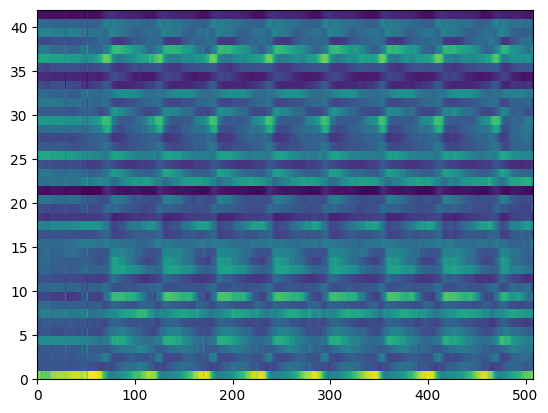

In [90]:
y = y.numpy()[0].T
plt.pcolor(y)

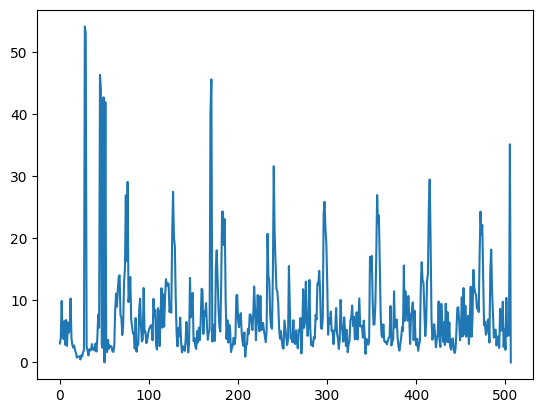

In [91]:
plt.plot(np.abs(np.diff(y)).sum(0))

In [11]:
plt.pcolor(np.diff(y))

ValueError: diff requires input that is at least one dimensional

In [12]:
plt.pcolor(np.diff(np.diff(y)))

ValueError: diff requires input that is at least one dimensional

In [46]:
# 120 features aprox (charsiu, +delta, +ddelta)

# media, std, abs->media, abs->std

# 480 features

# regresion lineal -> phonerate promedio (con y sin pausas)


In [21]:
from pydub import AudioSegment

# Pydub uses milliseconds
flac_file_path = '../tesis_speechRate/audios_tomas/tatata.wav'
tatata_audio = AudioSegment.from_file(flac_file_path, format="wav")
print(tatata_audio.duration_seconds)  # Outputs duration in seconds


5.099977324263039


In [22]:
tatata_audio

In [26]:
tatata_audio.converter

'ffmpeg'

In [60]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load the audio file
filename = '../tesis_speechRate/audios_tomas/tatata.wav'
waveform, sample_rate = librosa.load(filename, sr=16000)  # sr=None ensures original sample rate is used



In [61]:
waveform.shape

(81600,)

In [62]:
sample_rate

16000

In [63]:

audio_player = Audio(data=waveform, rate=sample_rate)
audio_player
